##READ ME
##TEIS IFSP Teaming Data Question

[The Tennessee Early Intervention System (TEIS)](https://www.tn.gov/didd/for-consumers/tennessee-early-intervention-system-teis.html) is a program that provides services to children ages birth up to age three who have disabilities or other developmental delays. In this project, you'll be looking into how teams that support children work together. 

You've been provided a spreadsheet containing data on children who received IFSP Teaming services. This spreadsheet is divided into two tabs.
* Tab 1 contains log details of all children receiving IFSP Teaming services between January 1, 2022 and January 31, 2023. See the data dictionary for a description of each column.
* Tab 2 contains a list of all children with IFSPs during the same timeframe. This includes a point of entry office, a referral date and an exit date.

Analysis Questions:
* How many children are receiving co-visits? What is the rate of co-visits? That is, out of children how have an IFSP, how many are receiving co-visits?
* Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits?
* What is the cadence of co-visits?
* In what setting do co-visits typically occur?
* Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within th esame agency? 
* Does participation vary by service type? by point of entry?

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
##EDA....part 1 import sreadsheet
##https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook
## xls = pd.ExcelFile('path_to_file.xls')
## df1 = pd.read_excel(xls, 'Sheet1')
## df2 = pd.read_excel(xls, 'Sheet2')

xlsx_teis = pd.ExcelFile('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx')
compiled_df1 = pd.read_excel(xlsx_teis, 'Compiled_IFSP Teaming')
children_df2 = pd.read_excel(xlsx_teis, 'All Children with IFSPs')


In [3]:
compiled_df1.head() 

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


In [4]:
children_df2.head()

,POE,Child ID,Referral Date,Exit Date
0,ET,508615,2021-08-06,NaT
1,ET,488455,2021-11-02,NaT
2,ET,494500,2020-12-14,NaT
3,ET,515143,2021-11-22,NaT
4,ET,505490,2021-06-15,NaT


In [5]:
print(compiled_df1.info(verbose=True))
print(children_df2.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CHILD_ID              9543 non-null   int64         
 1   SERVICE_DATE          9543 non-null   datetime64[ns]
 2   START_TIME            9532 non-null   object        
 3   END_TIME              9532 non-null   object        
 4   SERVICE_SETTING       9533 non-null   object        
 5   SERVICE DELIVERY      9543 non-null   object        
 6   ADD_USER              9543 non-null   object        
 7   ADD_DATE              9543 non-null   datetime64[ns]
 8   IFSP Teaming ID name  9543 non-null   object        
 9   Agency Name           9543 non-null   object        
 10  Agency Type           9543 non-null   object        
 11  Service Name          9543 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 894.8+ KB
None
<clas

In [6]:
print(compiled_df1.describe())
print(children_df2.info())

            CHILD_ID
count    9543.000000
mean   503923.012051
std     17148.944343
min    457136.000000
25%    492312.500000
50%    505531.000000
75%    515686.000000
max    542122.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138664 entries, 0 to 138663
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   POE            138664 non-null  object        
 1   Child ID       138664 non-null  int64         
 2   Referral Date  138664 non-null  datetime64[ns]
 3   Exit Date      15607 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 4.2+ MB
None


In [7]:
## min / max dates in compiled_df1 / children_df2
##https://stackoverflow.com/questions/23178129/getting-min-and-max-dates-from-a-pandas-dataframe
##min(df['some_property']) / max(df['some_property'])

print(min(compiled_df1['SERVICE_DATE']))
print(max(compiled_df1['SERVICE_DATE']))
print(min(children_df2['Referral Date']))
print(max(children_df2['Referral Date']))
print(min(children_df2['Exit Date']))
print(max(children_df2['Exit Date']))

2022-01-03 00:00:00
2023-01-31 00:00:00
2019-01-11 00:00:00
2023-01-31 00:00:00
NaT
NaT


In [8]:
##check unique count compiled_df1
#https://sparkbyexamples.com/pandas/pandas-count-unique-values-in-column/
#Count unique on multiple columns
#count = df[['Courses','Fee']].nunique()

count_df1 = compiled_df1[['CHILD_ID','SERVICE_SETTING','SERVICE DELIVERY','IFSP Teaming ID name','Agency Name','Agency Type','Service Name']].nunique() 
count_df1

CHILD_ID                4789
SERVICE_SETTING            4
SERVICE DELIVERY           4
IFSP Teaming ID name       3
Agency Name               85
Agency Type                3
Service Name              23
dtype: int64

In [9]:
##check unique count children_df2
count_df2 = children_df2[['POE','Child ID']].nunique() 
count_df2

POE             9
Child ID    19623
dtype: int64

In [10]:
##check unique values compiled_df1
##https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
print(compiled_df1['SERVICE_SETTING'].unique())
print(compiled_df1['SERVICE DELIVERY'].unique())
print(compiled_df1['IFSP Teaming ID name'].unique())
print(compiled_df1['Agency Name'].unique())
print(compiled_df1['Agency Type'].unique())
print(compiled_df1['Service Name'].unique())

['Community-based' 'Telehealth' 'Home' 'Other' nan]
['Service Delivered' 'Absence Due to Family' 'Family No Show'
 'Absence Due to Provider']
['IEP Meeting' 'Co-Visit' 'IFSP Meeting']
["Siskin Children's Institute (EIRA)" 'LTVEC' 'First Steps, Inc (EIRA)'
 'Sunshine Early Intervention - Knox Cty ARC'
 'Physical Therapy Services, PA (EIRA)' 'LeBonheur EI & Dev (LEAD) (EIRA)'
 'LeBonheur EI & Dev (LEAD) (vendor)'
 'Shelby Residential & Voc Svcs(SRVS) (EIRA)' 'Signal Centers, Inc.'
 'Therapy & Learning Center, Inc. (EIRA)'
 'Susan Gray School - Vanderbilt Univ'
 'Support Solutions of the Mid-South (CS Patterson)' "Kid's Putnam, Inc."
 'Little Folks Arc of Washington Co.'
 'Michael Dunn Center/ The Henry Center' 'Pediatric Language Clinic'
 'BRIDGES - Tennessee Tech University' 'Vanderbilt Bill Wilkerson Center'
 'BEST (Blind-Visually Impaired Early Svcs Tn)'
 'Can Do Kids Pediatric Therapy Services, LLC'
 'Morristown Hamblen Child Care Center' 'Emory Valley Center'
 'Progressive Direction

In [11]:
##check unique values children_df2
print(children_df2['POE'].unique())

['ET' 'FT' 'GN' 'MD' 'NW' 'SC' 'SE' 'SW' 'UC']


In [12]:
##Top 10 Agency Name compiled_df1
##https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column
##df['name'].value_counts().nlargest(5)

print(compiled_df1['Agency Name'].value_counts().nlargest(10))

LeBonheur EI & Dev (LEAD) (vendor)            924
Emory Valley Center                           730
Siskin Children's Institute (EIRA)            685
Physical Therapy Services, PA (EIRA)          589
LeBonheur EI & Dev (LEAD) (EIRA)              505
Therapy & Learning Center, Inc. (EIRA)        479
Kid's Putnam, Inc.                            445
WAVES, Inc.                                   429
Shelby Residential & Voc Svcs(SRVS) (EIRA)    323
Community Development Center                  304
Name: Agency Name, dtype: int64


In [13]:
##count IFSP Teaming ID
##https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/
##data['column_name'].value_counts()[value]
##['IEP Meeting' 'Co-Visit' 'IFSP Meeting']

print(compiled_df1['IFSP Teaming ID name'].value_counts()['IEP Meeting'])
print(compiled_df1['IFSP Teaming ID name'].value_counts()['Co-Visit'])
print(compiled_df1['IFSP Teaming ID name'].value_counts()['IFSP Meeting'])

632
4091
4820


<Axes: >

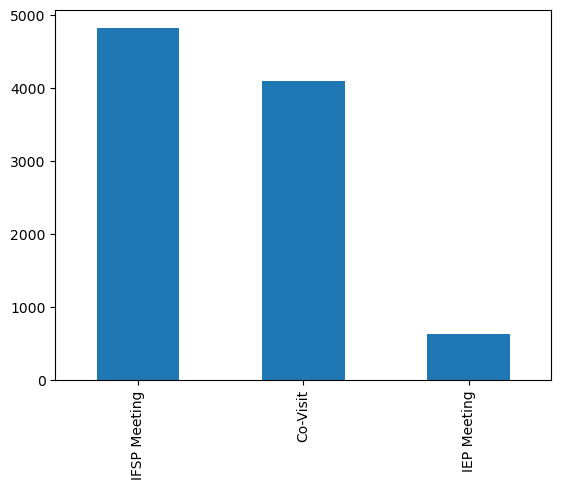

In [14]:
##view IFSP Teaming ID in chart
##used notes/example from socrata ap project
##convert to numeris required / example: map_res_df['query_count'] = pd.to_numeric(map_res_df['query_count'])
ifsp_plot = compiled_df1['IFSP Teaming ID name'].value_counts()
ifsp_plot.plot(kind='bar')

<Axes: >

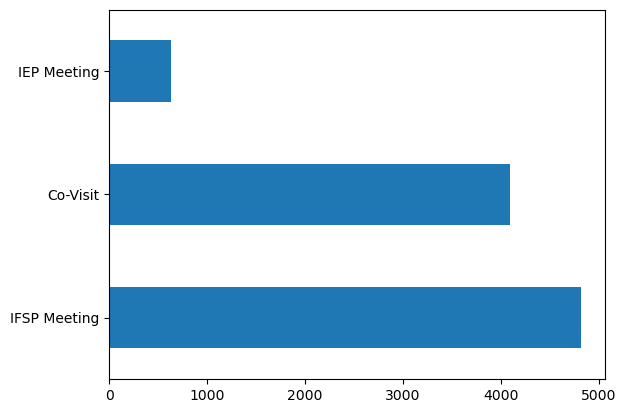

In [15]:
##horizontal bar chart
##https://datatofish.com/horizontal-bar-chart-matplotlib/
ifsp_plot.plot.barh()

<Axes: >

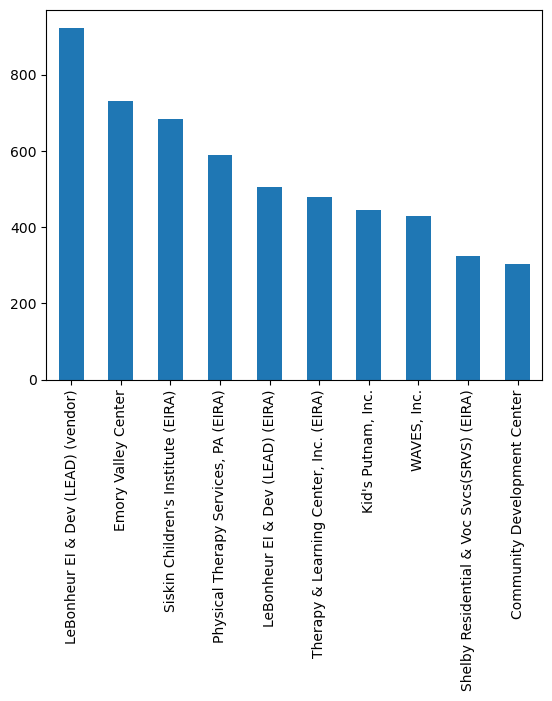

In [16]:
##view IFSP Teaming ID in chart
##used notes/example from socrata ap project
agency_top10_plot = compiled_df1['Agency Name'].value_counts().nlargest(10)
agency_top10_plot.plot(kind='bar')


plt.rcParams['figure.figsize'] = [10, 4]
map_res_df.plot.line(x='month_name', y='query_count')
plt.title('Map Queries Total Per Month Review 2014-2021')
plt.xlabel('Month')
plt.ylabel('Query Count')

<Axes: >

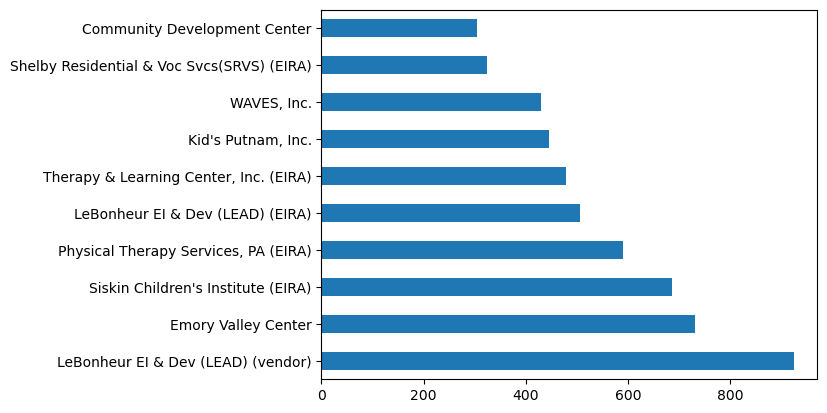

In [17]:
##horizontal bar chart
##https://datatofish.com/horizontal-bar-chart-matplotlib/
agency_top10_plot.plot.barh()

In [18]:
compiled_df1.head(1)

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community


In [19]:
##rename column names
##https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
##df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
compiled_df1 = compiled_df1.rename(columns={'SERVICE DELIVERY':'SERVICE_DELIVERY','IFSP Teaming ID name':'IFSP_TEAMING_ID_NAME','Agency Name':'AGENCY_NAME','Agency Type':'AGENCY_TYPE','Service Name':'SERVICE_NAME'})
children_df2 = children_df2.rename(columns={'Child ID': 'CHILD_ID', 'Referral Date':'REFERRAL_DATE', 'Exit Date':'EXIT_DATE'})

In [81]:
##Question 1. * How many children are receiving co-visits?   
##What is the rate of co-visits?That is, out of children how have an IFSP, how many are receiving co-visits?
##https://www.statology.org/pandas-select-rows-based-on-column-values/ | df.loc[df['points'] == 7]
#https://sparkbyexamples.com/python/pandas-get-number-of-rows-examples/#:~:text=Get%20Number%20of%20Rows%20in,()%20to%20get%20the%20count.
##len(df.index)

# Filter the rows where 'IFSP Teaming ID name' is 'Co-Visit'/ create new df / check len
covisit_check = compiled_df1.loc[compiled_df1['IFSP_TEAMING_ID_NAME'] == 'Co-Visit']
covisit_check_df = pd.DataFrame(covisit_check)
#Filter for SERVICE_DELIVERY = Service Delivered
covisit_check = covisit_check.loc[covisit_check['SERVICE_DELIVERY'] == 'Service Delivered']
covisit_check_df = pd.DataFrame(covisit_check)
print(len(covisit_check_df.index))
covisit_check_df.head(3)

4087


,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE_DELIVERY,ADD_USER,ADD_DATE,IFSP_TEAMING_ID_NAME,AGENCY_NAME,AGENCY_TYPE,SERVICE_NAME
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


In [82]:
#count unique children co-visits
unique_child_rcv_covisit = covisit_check_df.CHILD_ID.unique().size
print('count unique children receiving co-visits: '+str(unique_child_rcv_covisit))

#count unique ifsp children
ifsp_children = children_df2[['CHILD_ID']].nunique()
print('ifsp children unique count: ' + str(ifsp_children))

#calc percentage of children w/ ifsp receiving covisit
perct_child_ifsp_rcv_covisit = (covisit_check_df.CHILD_ID.unique().size / children_df2[['CHILD_ID']].nunique()) * 100
print('percentage of children with ifsp receiving co-visits: ' + str(perct_child_ifsp_rcv_covisit))

#sum co-visits
sum_covisits = covisit_check_df['CHILD_ID'].value_counts().sum()
print('sum of co-visits: '+str(sum_covisits))

#mean co-visits
mean_covisits = covisit_check_df['CHILD_ID'].value_counts().mean()
print('mean of co-visist: '+ str(mean_covisits))

#view nlargest / nsmallest
print('top 5 count of co-visit by child_id:')
print(covisit_check_df['CHILD_ID'].value_counts().nlargest(5))
print('bottom 5 count of co-visit by child_id:')
print(covisit_check_df['CHILD_ID'].value_counts().nsmallest(5))

count unique children receiving co-visits: 1642
ifsp children unique count: CHILD_ID    19623
dtype: int64
percentage of children with ifsp receiving co-visits: CHILD_ID    8.367732
dtype: float64
sum of co-visits: 4087
mean of co-visist: 2.4890377588306944
top 5 count of co-visit by child_id:
494031    48
480109    33
494794    31
481017    31
511895    30
Name: CHILD_ID, dtype: int64
bottom 5 count of co-visit by child_id:
529111    1
534648    1
529063    1
520346    1
534840    1
Name: CHILD_ID, dtype: int64


##ANSWER: 1645 children are receiving co-visits. The average amount of co-visits is 2.49. The largest number of co-visits for a single child_id was 48, the lowest number of co-visits was 1. 

In [83]:
##Question 2. * Children can have up to 6 co-visits per year. How many are recieving all 6 visits? 
##Are there any who are exceeding 6 visits?
##df.loc[df['points'] == 7
##https://stackoverflow.com/questions/38345213/using-value-counts-in-pandas-with-conditions
##my_value_count.loc[my_value_count.index < 0.4]
covisit_child_valuecount = covisit_check_df['CHILD_ID'].value_counts()
print('count of co-visits >= 6: ' + str(covisit_child_valuecount.loc[covisit_child_valuecount >= 6].sum()))
print('count co-visits < 6: ' + str(covisit_child_valuecount.loc[covisit_child_valuecount < 6].sum()))
print('total co-visits: ' + str(covisit_child_valuecount.loc[covisit_child_valuecount > 0].sum()))
print('percentage of co-visits >= 6: ' + str(((covisit_child_valuecount.loc[covisit_child_valuecount >= 6].sum()) / (covisit_child_valuecount.loc[covisit_child_valuecount > 0].sum()))*100))
print('percentage of co-visits < 6: ' + str(((covisit_child_valuecount.loc[covisit_child_valuecount < 6].sum()) / (covisit_child_valuecount.loc[covisit_child_valuecount > 0].sum()))*100))
print('child_id with > 6 co-visits:')
print(covisit_child_valuecount.loc[covisit_child_valuecount >= 6])

count of co-visits >= 6: 1434
count co-visits < 6: 2653
total co-visits: 4087
percentage of co-visits >= 6: 35.086860778076826
percentage of co-visits < 6: 64.91313922192316
child_id with > 6 co-visits:
494031    48
480109    33
494794    31
481017    31
511895    30
          ..
518156     6
513218     6
497482     6
519961     6
511790     6
Name: CHILD_ID, Length: 131, dtype: int64


##ANSWER:
##35.08% or 1435 of 4091 children listed for co-visits received 6 or more visits.
##64.92% or 2656 children listed for covisits received fewer than 6 visits.

In [84]:
##Question 3. What is the cadence of co-visits?
##df.loc[df['points'] == 7
print('count of co-visits > 1: ' + str(covisit_child_valuecount.loc[covisit_child_valuecount > 1].sum()))
print('percentage of covisits > 1: ' + str(((covisit_child_valuecount.loc[covisit_child_valuecount > 1].sum()) / (covisit_child_valuecount.loc[covisit_child_valuecount > 0].sum()))*100))
print(covisit_child_valuecount.loc[covisit_child_valuecount > 1])

count of co-visits > 1: 3199
percentage of covisits > 1: 78.27257156838758
494031    48
480109    33
494794    31
481017    31
511895    30
          ..
502494     2
488598     2
527618     2
530689     2
497839     2
Name: CHILD_ID, Length: 754, dtype: int64


In [85]:
# Sort the co-visit rows by CHILD_ID and SERVICE_DATE
co_visit_rows = covisit_check_df.sort_values(['CHILD_ID', 'SERVICE_DATE'])

# Calculate the time difference between consecutive co-visits for each child
co_visit_rows['VISIT_DIFF'] = co_visit_rows.groupby('CHILD_ID')['SERVICE_DATE'].diff()

# Remove the first co-visit for each child since it doesn't have a previous co-visit
co_visit_rows = co_visit_rows.dropna(subset=['VISIT_DIFF'])

# Print the resulting dataframe
print(co_visit_rows[['CHILD_ID', 'SERVICE_DATE', 'VISIT_DIFF']])

##avg_time_diff = co_visit_rows['VISIT_DIFF'].mean()

##print("Average time difference between co-visits:", avg_time_diff)

      CHILD_ID SERVICE_DATE VISIT_DIFF
9       459167   2022-01-26     0 days
12      459167   2022-01-26     0 days
10      459167   2022-02-09    14 days
11      459167   2022-02-09     0 days
13      459167   2022-02-09     0 days
...        ...          ...        ...
9526    539735   2023-01-31     0 days
9528    539820   2022-12-19     7 days
9529    539820   2023-01-23    35 days
9530    539820   2023-01-30     7 days
9533    539948   2023-01-31     0 days

[2445 rows x 3 columns]


In [86]:
morethan1 = co_visit_rows[co_visit_rows.VISIT_DIFF != '0 days']
morethan1.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE_DELIVERY,ADD_USER,ADD_DATE,IFSP_TEAMING_ID_NAME,AGENCY_NAME,AGENCY_TYPE,SERVICE_NAME,VISIT_DIFF
10,459167,2022-02-09,09:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2022-02-09 11:40:03,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,14 days
24,460965,2022-02-10,09:00:00,10:00:00,Community-based,Service Delivered,PULLIAMAMY,2022-02-10 18:12:55,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Dev. Therapy - BCBA,14 days
27,460965,2022-03-24,09:00:00,10:00:00,Telehealth,Service Delivered,PULLIAMAMY,2022-03-24 11:16:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Dev. Therapy - BCBA,42 days
30,461124,2022-02-01,16:45:00,17:15:00,Telehealth,Service Delivered,ROGERSKALEY,2022-02-04 18:04:33,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,28 days
43,462936,2022-01-10,09:30:00,10:30:00,Other,Service Delivered,ROBINSONMEGHAN,2022-01-11 10:09:21,Co-Visit,"Can Do Kids Pediatric Therapy Services, LLC",Independent,Occupational Therapy,5 days


In [87]:
# Calculate the average time difference
avg_time_diff = morethan1['VISIT_DIFF'].mean()
med_time_diff = morethan1['VISIT_DIFF'].median()
mode_time_diff = morethan1['VISIT_DIFF'].mode()

print("Average time difference between co-visits:", avg_time_diff)
print("Median time difference between co-visits:", med_time_diff)
print("Mode difference between cov-visits:", mode_time_diff)

Average time difference between co-visits: 41 days 17:10:37.068062827
Median time difference between co-visits: 28 days 00:00:00
Mode difference between cov-visits: 0   14 days
Name: VISIT_DIFF, dtype: timedelta64[ns]


In [88]:
##Question 4. In what setting do co-visits typically occur?
print(covisit_check_df['SERVICE_SETTING'].value_counts())
print('percent of home co-visit: ' + str(covisit_check_df.loc[covisit_check_df['SERVICE_SETTING'] == 'Home'].value_counts().sum() / len(covisit_check_df.index)*100))


Home               1940
Community-based     871
Telehealth          775
Other               501
Name: SERVICE_SETTING, dtype: int64
percent of home co-visit: 47.46758013212625


##ANSWER: 47.42% or 1941 of 4091 co-vists occurred in the 'Home' on most occasions. 

print(len(covisit_check_df.index))
print(covisit_check_df.loc[covisit_check_df['SERVICE_SETTING'] == 'Home'].value_counts().sum())
print(covisit_check_df.loc[covisit_check_df['SERVICE_SETTING'] == 'Community-based'].value_counts().sum())
print(covisit_check_df.loc[covisit_check_df['SERVICE_SETTING'] == 'Telehealth'].value_counts().sum())
print(covisit_check_df.loc[covisit_check_df['SERVICE_SETTING'] == 'Other'].value_counts().sum())

https://stackoverflow.com/questions/51325601/how-to-stop-my-pandas-data-table-from-being-truncated-when-printed
example: 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

And, if you want to set the options onlytemporarily, you can change it back to the default afterwards with pd.reset_option('display.max_rows|display.max_columns|display.width')

In [89]:
##Question 5. Who is performing co-visits? 
##Are they generally performed by the same provider or discipline or by multiple providers or disciplines? 
##Is it more likely for a co-visit to occur if vendor services are within the same agency? 
 
print('agencies performing co-visits: '+ str(len(covisit_check_df['AGENCY_NAME'].unique())))
print('sum of co-visits by agencies: '+str(covisit_check_df['AGENCY_NAME'].value_counts().sum()))
pd.set_option('display.max_rows', 100)
print('covisits by agency:')
print(covisit_check_df['AGENCY_NAME'].value_counts())
print('covisits by service name:')
print(covisit_check_df['SERVICE_NAME'].value_counts())
print('sum of co-visits by service: '+str(covisit_check_df['SERVICE_NAME'].value_counts().sum()))
pd.reset_option('display.max_rows')
#print(covisit_check_df['AGENCY_NAME'].unique())

agencies performing co-visits: 76
sum of co-visits by agencies: 4087
covisits by agency:
LeBonheur EI & Dev (LEAD) (vendor)                    901
LeBonheur EI & Dev (LEAD) (EIRA)                      340
Shelby Residential & Voc Svcs(SRVS) (EIRA)            232
Therapy & Learning Center, Inc. (EIRA)                216
Kid's Putnam, Inc.                                    212
Physical Therapy Services, PA (EIRA)                  181
WAVES, Inc.                                           169
Siskin Children's Institute (EIRA)                    149
Emory Valley Center                                   136
Expanding Horizons - ETSU                             130
Erlanger Health Care System/TC Thompson's Children    127
Michael Dunn Center/ The Henry Center                 112
Cleveland TN Hosp dba Tennova Healthcare-Cleveland    111
Signal Centers, Inc.                                   88
Rainbow Early Intervention (HATS)                      81
Middle Tennessee State University        

In [90]:
##review column headers / review unique service name
print(covisit_check_df.head(1))
print(covisit_check_df['SERVICE_NAME'].unique())

   CHILD_ID SERVICE_DATE START_TIME  END_TIME  SERVICE_SETTING  \
1    457136   2022-02-15   14:00:00  15:00:00  Community-based   

    SERVICE_DELIVERY   ADD_USER            ADD_DATE IFSP_TEAMING_ID_NAME  \
1  Service Delivered  LEECAROL1 2022-02-16 05:29:12             Co-Visit   

                          AGENCY_NAME AGENCY_TYPE  \
1  Siskin Children's Institute (EIRA)        EIRA   

                         SERVICE_NAME  
1  Dev. Therapy Prof - Home/Community  
['Dev. Therapy Prof - Home/Community' 'Physical Therapy Assistant'
 'Speech Therapy' 'Occupational Therapy' 'Dev. Therapy - BCBA'
 'Speech Therapy-Group' 'Dev. Therapy Center-Based' 'Physical Therapy'
 'Evaluation - Occupational Therapy' 'Vision Services'
 'Evaluation - Speech Therapy' 'Eval/Assess - Developmental'
 'Assistive Technology' 'Evaluation - BCBA Developmental Therapy'
 'Dev. Therapy – Registered Behavior Tech (RBT)'
 'Evaluation - Physical Therapy' 'Evaluation/Assessment - Vision'
 'Dev. Therapy - Behavior' 'O

##gkk = df.groupby(['Team', 'Position'])
##df.sort_values(by=['Column_name'], ascending=True)
##https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column
##test = covisit_check_df.groupby(['CHILD_ID'])
covisit_check_df.sort_values(by=['CHILD_ID'], ascending=True)

## GROUP PORTION START ##

##class questions for teis presentation:
1. How many children are receiving co-visits? What is the rate of co-visits? That is, out of children how have an IFSP, how many are receiving co-visits? What is the cadence of co-visits?
2. Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits? In what setting do co-visits typically occur?
3. Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within the same agency?
4. Does participation vary by service type? by service setting? by point of entry?
5. Free for all.

##sockswithsandals question for teis presenta:
##1. How many children are receiving co-visits? What is the rate of co-visits? 
##That is, out of children how have an IFSP, how many are receiving co-visits? 
##What is the cadence of co-visits?

##melanie ref for export sns plots: https://seaborn.pydata.org/tutorial/aesthetics.html
##melanie / erica assist with code for cadence

In [69]:
# Filter the rows where 'IFSP Teaming ID name' is 'Co-Visit'/ create new df / check len
covisit_check = compiled_df1.loc[compiled_df1['IFSP_TEAMING_ID_NAME'] == 'Co-Visit']
covisit_check_df = pd.DataFrame(covisit_check)
#Filter for SERVICE_DELIVERY = Service Delivered
covisit_check = covisit_check.loc[covisit_check['SERVICE_DELIVERY'] == 'Service Delivered']
covisit_check_df = pd.DataFrame(covisit_check)
print(len(covisit_check_df.index))
covisit_check_df.head(3)

4087


,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE_DELIVERY,ADD_USER,ADD_DATE,IFSP_TEAMING_ID_NAME,AGENCY_NAME,AGENCY_TYPE,SERVICE_NAME
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


##1. How many children are receiving co-visits? What is the rate of co-visits? 
##That is, out of children how have an IFSP, how many are receiving co-visits? 

In [71]:
#count unique children co-visits
unique_child_rcv_covisit = covisit_check_df.CHILD_ID.unique().size
print('count unique children receiving co-visits: '+str(unique_child_rcv_covisit))

#count unique ifsp children
ifsp_children = children_df2[['CHILD_ID']].nunique()
print('ifsp children unique count: ' + str(ifsp_children))

#calc percentage of children w/ ifsp receiving covisit
perct_child_ifsp_rcv_covisit = (covisit_check_df.CHILD_ID.unique().size / children_df2[['CHILD_ID']].nunique()) * 100
print('percentage of children with ifsp receiving co-visits: ' + str(perct_child_ifsp_rcv_covisit))

#sum co-visits
sum_covisits = covisit_check_df['CHILD_ID'].value_counts().sum()
print('sum of co-visits: '+str(sum_covisits))

#mean co-visits
mean_covisits = covisit_check_df['CHILD_ID'].value_counts().mean()
print('mean of co-visist: '+ str(mean_covisits))

#view nlargest / nsmallest
print('top 5 count of co-visit by child_id:')
print(covisit_check_df['CHILD_ID'].value_counts().nlargest(5))
print('bottom 5 count of co-visit by child_id:')
print(covisit_check_df['CHILD_ID'].value_counts().nsmallest(5))

count unique children receiving co-visits: 1642
ifsp children unique count: CHILD_ID    19623
dtype: int64
percentage of children with ifsp receiving co-visits: CHILD_ID    8.367732
dtype: float64
sum of co-visits: 4087
mean of co-visist: 2.4890377588306944
top 5 count of co-visit by child_id:
494031    48
480109    33
494794    31
481017    31
511895    30
Name: CHILD_ID, dtype: int64
bottom 5 count of co-visit by child_id:
529111    1
534648    1
529063    1
520346    1
534840    1
Name: CHILD_ID, dtype: int64


##What is the cadence of co-visits?

In [55]:
# Sort the co-visit rows by CHILD_ID and SERVICE_DATE
co_visit_rows = covisit_check_df.sort_values(['CHILD_ID', 'SERVICE_DATE'])

# Calculate the time difference between consecutive co-visits for each child
co_visit_rows['VISIT_DIFF'] = co_visit_rows.groupby('CHILD_ID')['SERVICE_DATE'].diff()

# Remove the first co-visit for each child since it doesn't have a previous co-visit
co_visit_rows = co_visit_rows.dropna(subset=['VISIT_DIFF'])

# Print the resulting dataframe
print(co_visit_rows[['CHILD_ID', 'SERVICE_DATE', 'VISIT_DIFF']])

morethan1 = co_visit_rows[co_visit_rows.VISIT_DIFF != '0 days']

# Calculate the average time difference
avg_time_diff = morethan1['VISIT_DIFF'].mean()
med_time_diff = morethan1['VISIT_DIFF'].median()
mode_time_diff = morethan1['VISIT_DIFF'].mode()

print("Average time difference between co-visits:", avg_time_diff)
print("Median time difference between co-visits:", med_time_diff)
print("Mode difference between cov-visits:", mode_time_diff)

      CHILD_ID SERVICE_DATE VISIT_DIFF
9       459167   2022-01-26     0 days
12      459167   2022-01-26     0 days
10      459167   2022-02-09    14 days
11      459167   2022-02-09     0 days
13      459167   2022-02-09     0 days
...        ...          ...        ...
9526    539735   2023-01-31     0 days
9528    539820   2022-12-19     7 days
9529    539820   2023-01-23    35 days
9530    539820   2023-01-30     7 days
9533    539948   2023-01-31     0 days

[2446 rows x 3 columns]
Average time difference between co-visits: 41 days 16:39:11.020408163
Median time difference between co-visits: 28 days 00:00:00
Mode difference between cov-visits: 0   14 days
Name: VISIT_DIFF, dtype: timedelta64[ns]


In [95]:
##filter df for child id , service date, service delivery for plot use
##https://sparkbyexamples.com/pandas/pandas-select-columns-by-name-or-index/
covisit_line_plot_df = covisit_check_df[['CHILD_ID','SERVICE_DATE','SERVICE_DELIVERY']]
print(covisit_line_plot_df.head())

   CHILD_ID SERVICE_DATE   SERVICE_DELIVERY
1    457136   2022-02-15  Service Delivered
6    458850   2022-02-15  Service Delivered
7    458851   2022-02-15  Service Delivered
8    459167   2022-01-26  Service Delivered
9    459167   2022-01-26  Service Delivered


In [138]:
##value_counts for service dates
service_date_plot = covisit_line_plot_df['SERVICE_DATE'].value_counts()

##convert to df
service_date_plot_df = pd.DataFrame(service_date_plot)

##fix columns
service_date_plot_df.columns = ['VALUE_COUNT']
service_date_plot_df.index.name = 'DATE'
service_date_plot_df = service_date_plot_df.reset_index()
##extract date info: https://sparkbyexamples.com/pandas/pandas-extract-month-and-year-separately-from-datetime-column/#:~:text=Use%20pandas%20DatetimeIndex()%20to,a%20date%20as%20an%20argument.
service_date_plot_df['YEAR'] = service_date_plot_df['DATE'].dt.year
service_date_plot_df['MONTH'] = service_date_plot_df['DATE'].dt.month
print(service_date_plot_df.info())
pd.set_option('display.max_rows', 300)
print(service_date_plot_df)
pd.reset_option('display.max_rows')
###Are there patterns in timeof year that co-visits occur?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         282 non-null    datetime64[ns]
 1   VALUE_COUNT  282 non-null    int64         
 2   YEAR         282 non-null    int64         
 3   MONTH        282 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.9 KB
None
          DATE  VALUE_COUNT  YEAR  MONTH
0   2022-06-14           38  2022      6
1   2022-12-06           33  2022     12
2   2022-11-22           33  2022     11
3   2022-02-15           32  2022      2
4   2022-09-15           31  2022      9
5   2023-01-19           31  2023      1
6   2022-11-09           31  2022     11
7   2022-12-14           30  2022     12
8   2022-04-26           30  2022      4
9   2022-06-02           30  2022      6
10  2023-01-11           29  2023      1
11  2022-03-23           29  2022      3
12  202

In [151]:
##group by for chart

##group by year / month | https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
service_date_groupby_df = service_date_plot_df.groupby([(service_date_plot_df.YEAR), (service_date_plot_df.MONTH)]).sum()
service_date_groupby_df

C:\Users\larld\AppData\Local\Temp\ipykernel_7544\2384709080.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  service_date_groupby_df = service_date_plot_df.groupby([(service_date_plot_df.YEAR), (service_date_plot_df.MONTH)]).sum()


VALUE_COUNT
YEAR MONTH             
2022 1              298
     2              327
     3              382
     4              303
     5              332
     6              334
     7              233
     8              284
     9              280
     10             289
     11             322
     12             311
2023 1              392

viol_plot = viol_counts[:10].plot(kind='bar')

viol_plot.set_ylabel('No. of Violations')
viol_plot.set_title('Audit Results')
viol_plot.set_xticks(ind+width)
viol_plot.set_xticklabels( ('A', 'B','C') )
##https://stackoverflow.com/questions/31536202/renaming-x-axis-labels-when-using-matplotlib-and-pandas

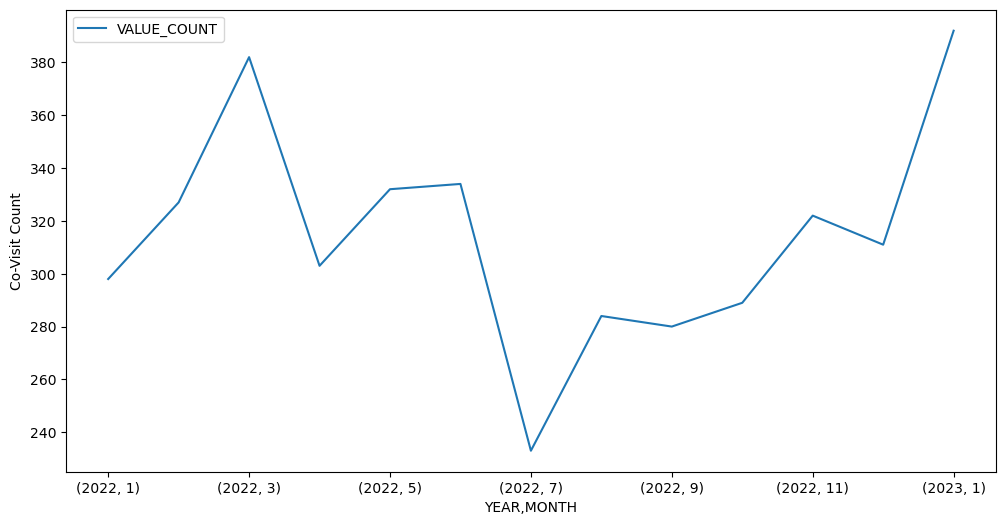

In [184]:
service_date_lineplot = service_date_groupby_df.plot.line()
service_date_lineplot.set_ylabel('Co-Visit Count')
##service_date_lineplot.set_xticks(MONTH+YEAR)
##labels = ('Jan-22', 'Mar-22','May-22', 'Jul-22', 'Sep-22', 'Nov-22', 'Jan-23' ) 
##service_date_lineplot.set_xticklabels(labels)
plt.rcParams['figure.figsize'] = [12, 6]


##https://stackoverflow.com/questions/31536202/renaming-x-axis-labels-when-using-matplotlib-and-pandas

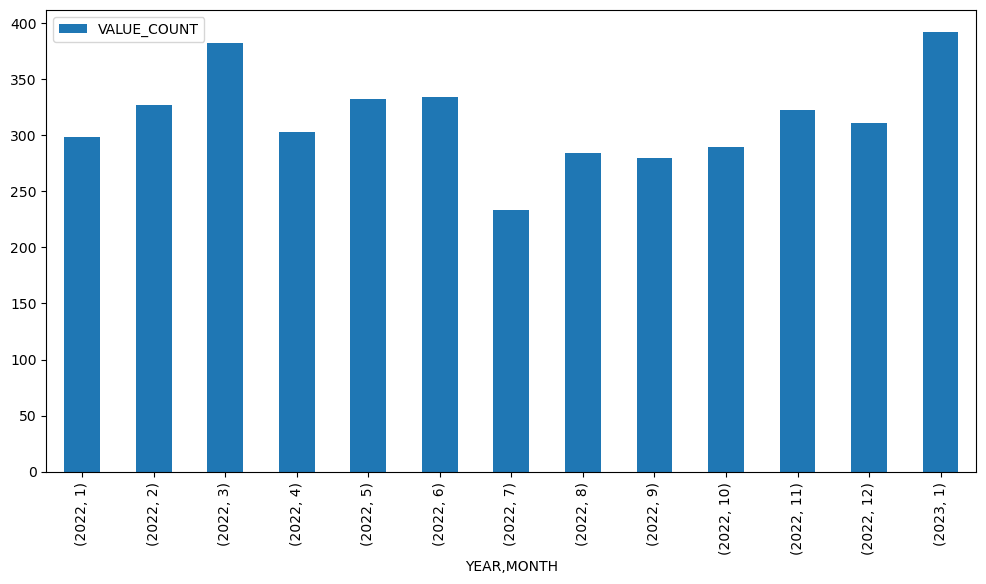

In [174]:
service_date_groupby_df.plot.bar()
plt.rcParams['figure.figsize'] = [12, 6]